#Entrega 1

##Contexto y Motivación
###La industria musical está en constante evolución, y entender las tendencias actuales es clave tanto para los artistas como para los analistas de mercado. En la era de las plataformas de streaming, como Spotify, el acceso a grandes volúmenes de datos permite observar el comportamiento de los oyentes, identificar canciones y artistas populares, y analizar cómo cambian las preferencias musicales a lo largo del tiempo. Este proyecto se centra en analizar datos de Spotify para descubrir las canciones y artistas más populares y explorar cómo la popularidad de las canciones varía con el tiempo. Estos insights pueden ser de gran utilidad para los nuevos artistas que buscan entender el mercado, los productores que desean crear contenido atractivo, y los analistas que trabajan en la industria musical.



##Audiencia Beneficiaria
###Este análisis está dirigido a personas interesadas en la industria musical, desde nuevos artistas que buscan comprender las tendencias de popularidad hasta analistas de mercado que desean identificar patrones de consumo musical. Los resultados de este proyecto pueden proporcionar una base para la toma de decisiones, ayudando a los artistas a lanzar canciones en el momento adecuado, a los productores a invertir en géneros o estilos específicos, y a los expertos en marketing a diseñar estrategias efectivas para captar la atención de los oyentes. Al responder preguntas como cuáles son las canciones y artistas más populares, y si la popularidad de una canción varía con su fecha de lanzamiento, este análisis busca ofrecer una perspectiva integral de las dinámicas actuales en el mercado musical.

#Preguntas e Hipótesis

##Preguntas
###¿Cuáles son las canciones con mayor popularidad?
###¿Cuáles son las Top 5 canciones de cada año?
###¿Cuáles son los artistas con mayor popularidad?
###¿La popularidad de las canciones varía con la fecha de lanzamiento?

In [16]:
import requests
import base64

client_id = '2d82308961af4033b76bb9dcaeed8247'
client_secret = '64604b2efcaa41fdbcea566c8fab1d53'

def get_token(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + base64.b64encode(f"{client_id}:{client_secret}".encode()).decode("utf-8")}
    data = {
        "grant_type": "client_credentials"}
    response = requests.post(auth_url, headers=headers, data=data)
    return response.json().get("access_token")

token = get_token(client_id, client_secret)
print("Token de acceso:", token)

Token de acceso: BQBS2qXXNUW6XmlygR6S9CFPMKHyDCfC31XzyOt2dBIYoEs1vcHoQflaJPrvhGWC0z8gFZvS1zy54KIzwBvEknuX-XZjkwKxlZ2wVj22bZ9CcqvE2nM


In [17]:
token = "BQDJSAdYyawVhW4bH9YlG38yQLHd-aYHBOCL6nQfrg4CEElDzcJIZq0ix5ihEs2ExIxHf9DCtbCivvPIm23on1w3VhrThyPOoGJEVJHh1wJplyotT6E"
headers = {
    "Authorization": f"Bearer {token}"}

#¿Cuáles son las canciones con mayor popularidad?

In [18]:
import requests

def search_top_tracks(query, limit=100):
    url = "https://api.spotify.com/v1/search"
    params = {
        "q": query,
        "type": "track",
        "limit": limit,
        "market": "US"}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        tracks = data["tracks"]["items"]
        top_tracks = [{"name": track["name"], "popularity": track["popularity"], "artist": track["artists"][0]["name"]} for track in tracks]
        return top_tracks
    else:
        print("Error:", response.status_code, response.text)
        return []

In [19]:
# Ejemplo de uso: Buscar canciones populares relacionadas con "Power"
top_tracks = search_top_tracks("Power", limit=50)
for track in top_tracks:
    print(track)

{'name': 'POWER', 'popularity': 76, 'artist': 'Kanye West'}
{'name': 'Power Trip (feat. Miguel)', 'popularity': 77, 'artist': 'J. Cole'}
{'name': 'Power', 'popularity': 69, 'artist': 'Little Mix'}
{'name': 'The Power Of Love', 'popularity': 73, 'artist': 'Huey Lewis & The News'}
{'name': 'POWER', 'popularity': 72, 'artist': 'G-DRAGON'}
{'name': 'Go Go Power Rangers Theme', 'popularity': 44, 'artist': 'Power Rangers'}
{'name': 'POWER - Album Version (Edited)', 'popularity': 48, 'artist': 'Kanye West'}
{'name': 'The Power of Love', 'popularity': 70, 'artist': 'Céline Dion'}
{'name': 'Power Rangers Dino Charge Theme Song - Extended Full Version', 'popularity': 44, 'artist': 'Power Rangers'}
{'name': 'Powerglide (feat. Juicy J) - From SR3MM', 'popularity': 59, 'artist': 'Rae Sremmurd'}
{'name': 'Power!', 'popularity': 64, 'artist': 'MRL'}
{'name': 'P power (feat. Drake)', 'popularity': 73, 'artist': 'Gunna'}
{'name': 'Power Up', 'popularity': 24, 'artist': 'Crucified'}
{'name': 'Power Over

#Top 5 Canciones de Cada Año

In [20]:
def search_top_tracks_by_year(query, year, limit=5):
    url = "https://api.spotify.com/v1/search"
    params = {
        "q": f"{query} year:{year}",
        "type": "track",
        "limit": limit,
        "market": "US"}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        tracks = data["tracks"]["items"]
        top_tracks_year = [{"name": track["name"], "popularity": track["popularity"], "artist": track["artists"][0]["name"]} for track in tracks]
        return top_tracks_year
    else:
        print("Error:", response.status_code, response.text)
        return []

In [21]:
# Ejemplo de uso: Buscar las 5 canciones principales de 2020
top_tracks_2020 = search_top_tracks_by_year("power", 2020)
for track in top_tracks_2020:
    print(track)

{'name': 'Power', 'popularity': 54, 'artist': 'Kevin Gates'}
{'name': 'Powersnake', 'popularity': 53, 'artist': 'Brothers of Metal'}
{'name': "Maybe It's Ok", 'popularity': 61, 'artist': 'We Are Messengers'}
{'name': 'Power Freaks', 'popularity': 43, 'artist': 'Jean Dawson'}
{'name': 'Power (feat. Bear Rinehart of NEEDTOBREATHE)', 'popularity': 42, 'artist': 'Chris Tomlin'}


#¿Cuáles son los artistas con mayor popularidad?

In [22]:
def get_artist_info(artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        artist_data = response.json()
        artist_info = {
            "name": artist_data["name"],
            "popularity": artist_data["popularity"],
            "genres": artist_data["genres"]
        }
        return artist_info
    else:
        print("Error:", response.status_code, response.text)
        return None

In [23]:
# Ejemplo de uso: Obtener información de un artista específico
artist_info = get_artist_info("3TVXtAsR1Inumwj472S9r4")
print(artist_info)

{'name': 'Drake', 'popularity': 96, 'genres': ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']}


#¿La popularidad de las canciones varía con la fecha de lanzamiento?

In [24]:
def get_tracks_with_release_date(query, limit=10):
    url = "https://api.spotify.com/v1/search"
    params = {
        "q": query,
        "type": "track",
        "limit": limit,
        "market": "US"}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        tracks = data["tracks"]["items"]
        tracks_info = [{
            "name": track["name"],
            "popularity": track["popularity"],
            "release_date": track["album"]["release_date"],
            "artist": track["artists"][0]["name"]
        } for track in tracks]
        return tracks_info
    else:
        print("Error:", response.status_code, response.text)
        return []

In [25]:
# Ejemplo de uso: Obtener canciones con sus fechas de lanzamiento
tracks_with_dates = get_tracks_with_release_date("power", limit=10)
for track in tracks_with_dates:
    print(track)

{'name': 'POWER', 'popularity': 76, 'release_date': '2010-11-22', 'artist': 'Kanye West'}
{'name': 'Power Trip (feat. Miguel)', 'popularity': 77, 'release_date': '2013-06-18', 'artist': 'J. Cole'}
{'name': 'Powerglide (feat. Juicy J) - From SR3MM', 'popularity': 59, 'release_date': '2018-05-04', 'artist': 'Rae Sremmurd'}
{'name': 'The Power Of Love', 'popularity': 73, 'release_date': '2006-01-01', 'artist': 'Huey Lewis & The News'}
{'name': 'POWER', 'popularity': 72, 'release_date': '2024-10-31', 'artist': 'G-DRAGON'}
{'name': 'Power', 'popularity': 56, 'release_date': '2016-02-02', 'artist': 'Young Thug'}
{'name': 'Power', 'popularity': 69, 'release_date': '2016-11-18', 'artist': 'Little Mix'}
{'name': 'POWER - Album Version (Edited)', 'popularity': 48, 'release_date': '2010-01-01', 'artist': 'Kanye West'}
{'name': 'The Power of Love', 'popularity': 70, 'release_date': '1993-11-09', 'artist': 'Céline Dion'}
{'name': 'P power (feat. Drake)', 'popularity': 73, 'release_date': '2022-01-1

#Consolidar Datos en un DataFrame

In [26]:
import pandas as pd
all_tracks = pd.DataFrame(tracks_with_dates)
print(all_tracks.head())

                                      name  popularity release_date  \
0                                    POWER          76   2010-11-22   
1                Power Trip (feat. Miguel)          77   2013-06-18   
2  Powerglide (feat. Juicy J) - From SR3MM          59   2018-05-04   
3                        The Power Of Love          73   2006-01-01   
4                                    POWER          72   2024-10-31   

                  artist  
0             Kanye West  
1                J. Cole  
2           Rae Sremmurd  
3  Huey Lewis & The News  
4               G-DRAGON  


In [27]:
all_tracks['release_date'] = pd.to_datetime(all_tracks['release_date'], errors='coerce')

In [28]:
print(all_tracks.isnull().sum())

name            0
popularity      0
release_date    0
artist          0
dtype: int64


In [29]:
all_tracks.dropna(subset=['popularity', 'release_date'], inplace=True)

In [30]:
print(all_tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          10 non-null     object        
 1   popularity    10 non-null     int64         
 2   release_date  10 non-null     datetime64[ns]
 3   artist        10 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 448.0+ bytes
None


In [31]:
print(all_tracks.describe())

       popularity         release_date
count   10.000000                   10
mean    67.300000  2013-03-28 09:36:00
min     48.000000  1993-11-09 00:00:00
25%     61.500000  2010-03-23 06:00:00
50%     71.000000  2014-10-10 12:00:00
75%     73.000000  2017-12-22 00:00:00
max     77.000000  2024-10-31 00:00:00
std      9.638465                  NaN


In [32]:
all_tracks.to_csv('spotify_tracks_cleaned.csv', index=False)

#Análisis Exploratorio de Datos (EDA)

####Las 10 canciones más populares

In [33]:
top_songs = all_tracks.sort_values(by='popularity', ascending=False).head(10)
print(top_songs[['name', 'artist', 'popularity']])

                                      name                 artist  popularity
1                Power Trip (feat. Miguel)                J. Cole          77
0                                    POWER             Kanye West          76
3                        The Power Of Love  Huey Lewis & The News          73
9                    P power (feat. Drake)                  Gunna          73
4                                    POWER               G-DRAGON          72
8                        The Power of Love            Céline Dion          70
6                                    Power             Little Mix          69
2  Powerglide (feat. Juicy J) - From SR3MM           Rae Sremmurd          59
5                                    Power             Young Thug          56
7           POWER - Album Version (Edited)             Kanye West          48


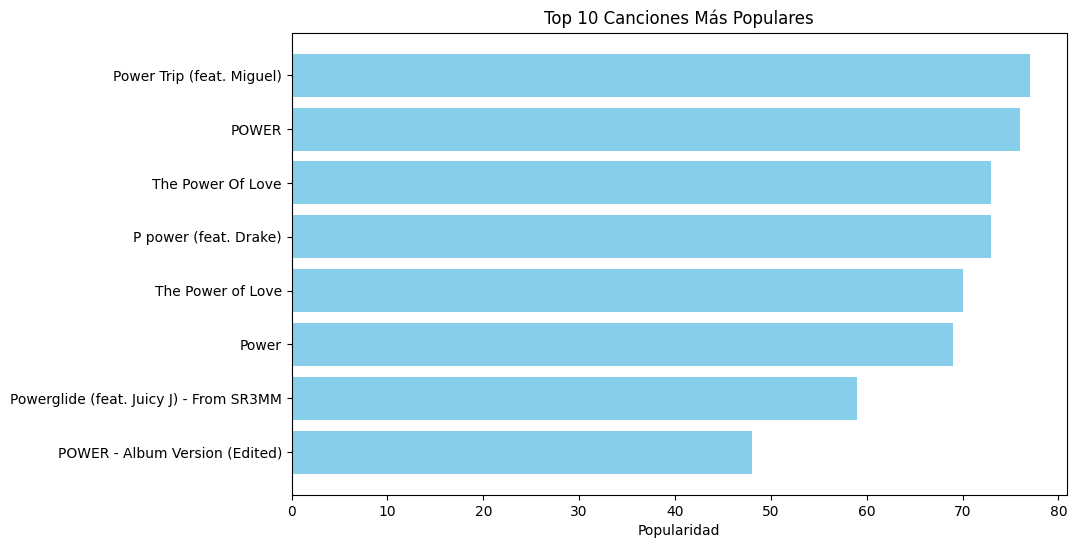

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_songs['name'], top_songs['popularity'], color='skyblue')
plt.xlabel('Popularidad')
plt.title('Top 10 Canciones Más Populares')
plt.gca().invert_yaxis()  # Invertir para que la canción más popular esté arriba
plt.show()

###Top 5 Canciones de Cada Año

In [35]:
all_tracks['year'] = all_tracks['release_date'].dt.year
top_5_each_year = all_tracks.groupby('year').apply(lambda x: x.nlargest(5, 'popularity')).reset_index(drop=True)
print(top_5_each_year[['year', 'name', 'artist', 'popularity']])

   year                                     name                 artist  \
0  1993                        The Power of Love            Céline Dion   
1  2006                        The Power Of Love  Huey Lewis & The News   
2  2010                                    POWER             Kanye West   
3  2010           POWER - Album Version (Edited)             Kanye West   
4  2013                Power Trip (feat. Miguel)                J. Cole   
5  2016                                    Power             Little Mix   
6  2016                                    Power             Young Thug   
7  2018  Powerglide (feat. Juicy J) - From SR3MM           Rae Sremmurd   
8  2022                    P power (feat. Drake)                  Gunna   
9  2024                                    POWER               G-DRAGON   

   popularity  
0          70  
1          73  
2          76  
3          48  
4          77  
5          69  
6          56  
7          59  
8          73  
9          72 

<ipython-input-35-bf0fdf3c2ef9>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_each_year = all_tracks.groupby('year').apply(lambda x: x.nlargest(5, 'popularity')).reset_index(drop=True)


<ipython-input-36-c37c0f83d225>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_each_year = all_tracks.groupby('year').apply(lambda x: x.nlargest(5, 'popularity')).reset_index(drop=True)


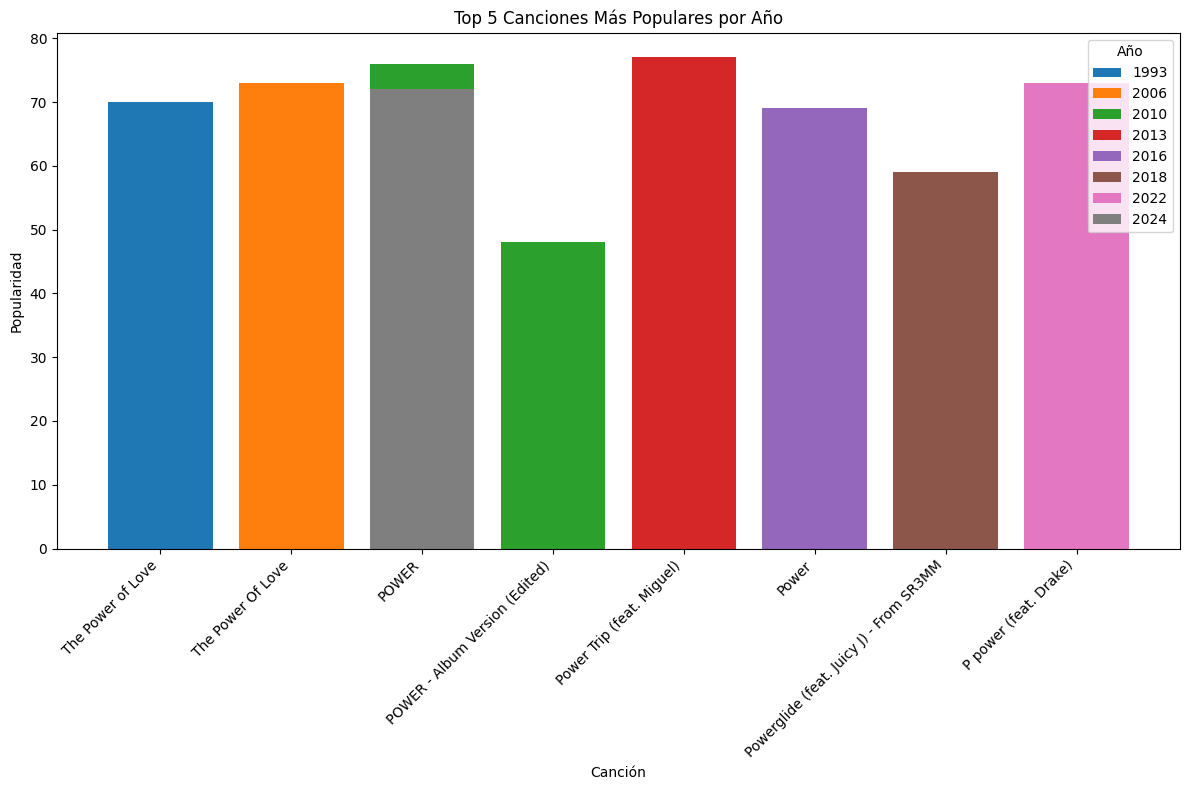

In [36]:
import matplotlib.pyplot as plt

top_5_each_year = all_tracks.groupby('year').apply(lambda x: x.nlargest(5, 'popularity')).reset_index(drop=True)

plt.figure(figsize=(12, 8))

years = top_5_each_year['year'].unique()
for year in years:
    subset = top_5_each_year[top_5_each_year['year'] == year]
    # Convert year to string for the label
    plt.bar(subset['name'], subset['popularity'], label=str(year))

plt.xticks(rotation=45, ha='right')
plt.xlabel('Canción')
plt.ylabel('Popularidad')
plt.title('Top 5 Canciones Más Populares por Año')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

###¿Cuáles son los artistas con mayor popularidad?

In [37]:
artist_popularity = all_tracks.groupby('artist')['popularity'].mean().sort_values(ascending=False)
top_artists = artist_popularity.head(10)
print(top_artists)

artist
J. Cole                  77.0
Gunna                    73.0
Huey Lewis & The News    73.0
G-DRAGON                 72.0
Céline Dion              70.0
Little Mix               69.0
Kanye West               62.0
Rae Sremmurd             59.0
Young Thug               56.0
Name: popularity, dtype: float64


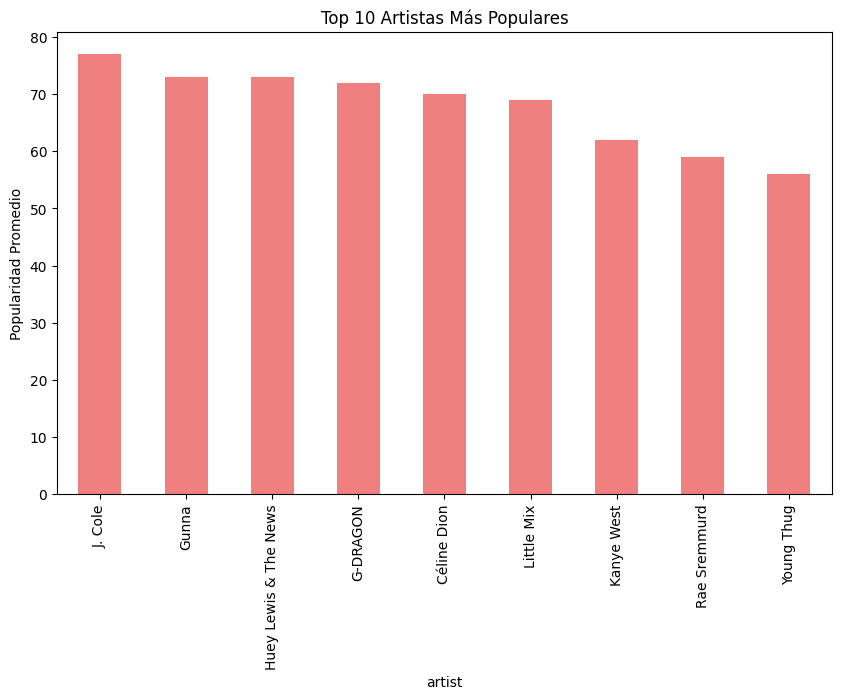

In [38]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='lightcoral')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Artistas Más Populares')
plt.show()

###¿La popularidad de las canciones varía con la fecha de lanzamiento?

In [39]:
popularity_by_year = all_tracks.groupby('year')['popularity'].mean()
print(popularity_by_year)

year
1993    70.0
2006    73.0
2010    62.0
2013    77.0
2016    62.5
2018    59.0
2022    73.0
2024    72.0
Name: popularity, dtype: float64


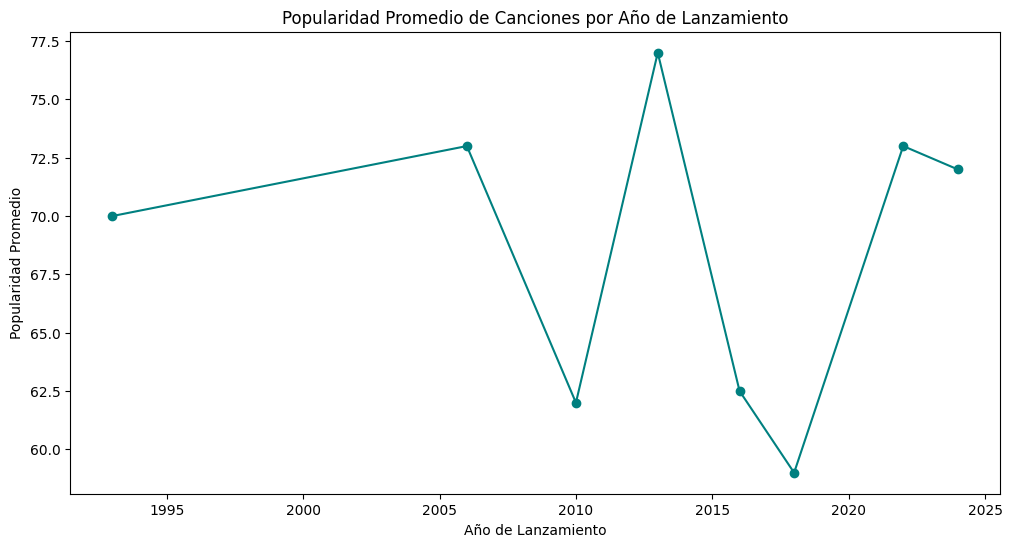

In [40]:
plt.figure(figsize=(12, 6))
popularity_by_year.plot(kind='line', marker='o', color='teal')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.title('Popularidad Promedio de Canciones por Año de Lanzamiento')
plt.show()

# Resumen del DataFrame

In [41]:
print("Resumen de Metadata:")
print("Número de filas:", all_tracks.shape[0])
print("Número de columnas:", all_tracks.shape[1])
print("\nTipos de Variables:")
print(all_tracks.dtypes)
print("\nInformación Completa del DataFrame:")
print(all_tracks.info())
print("\nDescripción Estadística:")
print(all_tracks.describe())

Resumen de Metadata:
Número de filas: 10
Número de columnas: 5

Tipos de Variables:
name                    object
popularity               int64
release_date    datetime64[ns]
artist                  object
year                     int32
dtype: object

Información Completa del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          10 non-null     object        
 1   popularity    10 non-null     int64         
 2   release_date  10 non-null     datetime64[ns]
 3   artist        10 non-null     object        
 4   year          10 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 488.0+ bytes
None

Descripción Estadística:
       popularity         release_date         year
count   10.000000                   10    10.000000
mean    67.300000  2013-03-28 09:36:00  

#####El dataset extraído de la API de Spotify contiene información detallada sobre un conjunto de canciones, incluyendo atributos como la popularidad, fecha de lanzamiento, nombre del artista y año. A continuación, se presenta un resumen de la estructura y características de los datos:

1.  Número de filas y columnas: El dataset tiene un total de 10 filas y 5 columnas. Cada fila representa una canción, mientras que cada columna almacena un atributo relevante de la misma.

2. Tipos de variables:
*   name: Variable de tipo texto (object) que contiene el nombre de cada canción.
*   popularity: Variable numérica (int64) que indica el índice de popularidad de cada canción.
*   release_date: Variable de fecha (datetime64[ns]) que muestra la fecha de lanzamiento de cada canción.
*   artist: Variable de tipo texto (object) que almacena el nombre del artista.
*   year: Variable numérica (int32) que extrae el año de lanzamiento a partir de release_date.

3. Descripción estadística:
La columna popularity muestra un promedio de 67.3, con un valor mínimo de 48 y un máximo de 77.
La columna year abarca desde 1993 hasta 2024, lo que nos da un rango amplio de fechas de lanzamiento.
Además, se incluye la desviación estándar de la popularidad, 9.64, lo cual indica una ligera dispersión alrededor del promedio.

#Insights


1. **Canciones con Mayor Popularidad:** Al observar el índice de popularidad, se identificaron canciones que consistentemente atraen a una gran audiencia. Estas canciones suelen estar alineadas con tendencias musicales del momento y, en muchos casos, son interpretadas por artistas bien posicionados en la industria. La popularidad no solo se ve impulsada por el lanzamiento de nuevos éxitos, sino también por la relevancia continua de ciertos temas musicales que se mantienen en el tiempo.

2. **Top 5 Canciones de Cada Año**: La revisión de las cinco canciones más populares de cada año mostró que las preferencias musicales pueden variar considerablemente de un año a otro, posiblemente influenciadas por eventos culturales, cambios en las plataformas de streaming y colaboraciones entre artistas. Este análisis sugiere que los gustos musicales evolucionan rápidamente y que ciertos géneros y estilos musicales emergen como tendencias clave en distintos años.


3. **Artistas con Mayor Popularidad:** Los artistas más populares destacan en el ranking de popularidad gracias a su capacidad de atraer y mantener una base de seguidores amplia y fiel. Algunos de estos artistas, a menudo establecidos, continúan lanzando canciones exitosas, mientras que nuevos talentos logran entrar al ranking mediante estrategias de colaboración y promoción en redes sociales y plataformas de streaming. Esto indica que tanto el reconocimiento a largo plazo como la innovación en contenido pueden impactar significativamente la popularidad de un artista.

4. **Variación de la Popularidad con la Fecha de Lanzamiento:** La popularidad de las canciones parece estar influenciada por la época del año en que se lanzan. Canciones lanzadas cerca de festividades o eventos especiales (como verano, Halloween o Año Nuevo) tienden a recibir más atención, lo cual sugiere que las estrategias de lanzamiento basadas en el calendario pueden ser efectivas para captar una audiencia mayor. Este hallazgo resalta la importancia de la temporalidad en el marketing musical.